In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
mt=pd.read_csv("meituan_test.csv")

In [3]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      1680 non-null   object 
 1   web-scraper-start-url  1680 non-null   object 
 2   name                   1680 non-null   object 
 3   address                1680 non-null   object 
 4   rating                 1663 non-null   float64
 5   comment                1524 non-null   float64
 6   price                  1667 non-null   float64
 7   cat                    1680 non-null   object 
dtypes: float64(3), object(5)
memory usage: 105.1+ KB


In [4]:
mt.head()

,web-scraper-order,web-scraper-start-url,name,address,rating,comment,price,cat
0,1563028765-1694,http://sh.meituan.com/meishi/c35/pn8/,斯比特花园意大利餐厅（新世界大丸百货店）,黄浦区南京东路228号新世界大丸百货6层人均,4.2,2169.0,98.0,foreign
1,1563028775-1753,http://sh.meituan.com/meishi/c35/pn3/,好伦哥自助餐厅（南京东路店）,黄浦区南京东路600号亚太广场6楼1室人均,3.0,6005.0,73.0,foreign
2,1563028769-1720,http://sh.meituan.com/meishi/c35/pn6/,蘭赫咖啡（周浦店）,浦东新区年家浜路327号三楼（全季酒店三楼）人均,4.2,326.0,55.0,foreign
3,1563028721-1396,http://sh.meituan.com/meishi/c35/pn29/,地中海的月亮（虹桥·食尚天地店）,青浦区沪青平公路1899号虹桥·食尚天地1栋1层106-3人均,3.5,NaN,107.0,foreign
4,1563028767-1705,http://sh.meituan.com/meishi/c35/pn7/,拉蒂娜巴西烤肉自助餐Latina（长泰店）,浦东新区祖冲之路1239弄长泰广场1E09东庭院（地铁2号线4号出口左侧50米，星巴克后面）人均,3.4,657.0,148.0,foreign


# 缺失值处理

In [5]:
#drop掉
mt=mt.dropna(subset=["price"])

In [6]:
#默认填充
mt["rating"]=mt["rating"].fillna(3)

In [7]:
mt["comment"]=mt["comment"].fillna(0)

In [8]:
mt.describe()

,rating,comment,price
count,1667.000000,1667.000000,1667.000000
mean,4.204079,512.169166,109.988002
std,0.520557,1415.567751,93.524620
min,3.000000,0.000000,9.000000
25%,3.900000,6.000000,60.000000
50%,4.100000,49.000000,89.000000
75%,4.500000,369.500000,123.000000
max,5.000000,24585.000000,1670.000000


# 数据相关性分析

In [10]:
cols=['rating','comment','price']
mt[cols].corr()

,rating,comment,price
rating,1.000000,0.076882,0.189531
comment,0.076882,1.000000,-0.128461
price,0.189531,-0.128461,1.000000


<AxesSubplot:xlabel='price', ylabel='rating'>

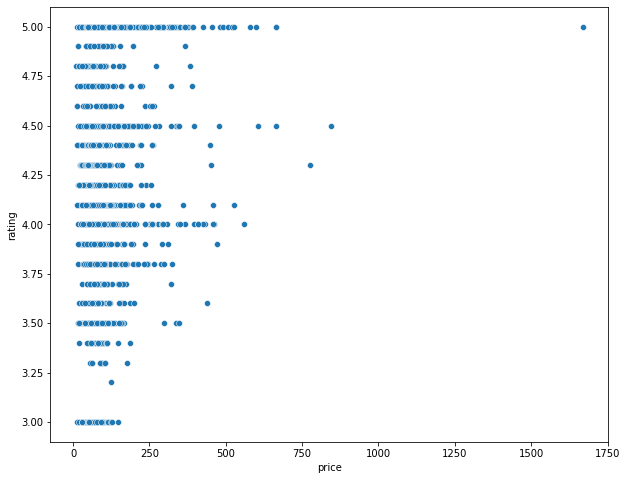

In [14]:
#散点图可视化price与rating相关性
plt.pyplot.figure(figsize=(10,8)) 
sns.scatterplot(x="price", y="rating", data=mt)

In [17]:
#将rating分组
bins=[3,3.5,4,4.5,5]
labels=['<=3.5','<=4',"<=4.5","<=5"]
mt['rating2']=pd.cut(mt.rating,bins,right=True,labels=labels)
mt.groupby(["rating2"])["rating"].describe()

,count,mean,std,min,25%,50%,75%,max
rating2,,,,,,,,
<=3.5,204.0,3.475000,0.057127,3.2,3.5,3.5,3.5,3.5
<=4,494.0,3.892510,0.127881,3.6,3.8,3.9,4.0,4.0
<=4.5,537.0,4.336872,0.154714,4.1,4.2,4.4,4.5,4.5
<=5,392.0,4.917092,0.131444,4.6,4.8,5.0,5.0,5.0


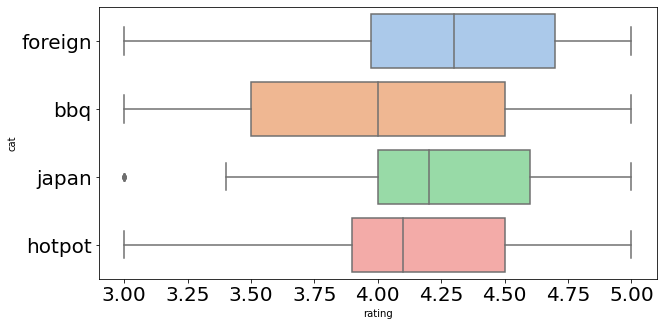

In [18]:
#箱线图
plt.pyplot.figure(figsize=(10,5))
sns.boxplot(x='rating',y='cat',palette=sns.color_palette('pastel'),data=mt)
plt.pyplot.tick_params(labelsize=20)

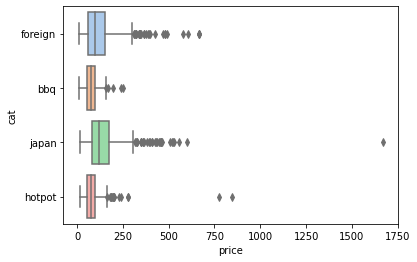

In [20]:
sns.boxplot(x='price',y='cat',palette=sns.color_palette('pastel'),data=mt)
plt.pyplot.tick_params(labelsize=10)

<AxesSubplot:xlabel='cat', ylabel='count'>

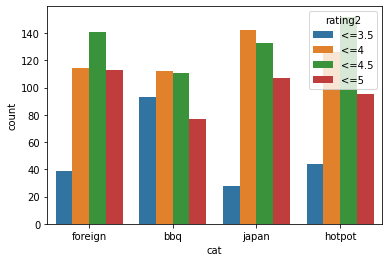

In [19]:
#计数柱状图不同美食品类的评分情况
sns.countplot(x="cat",hue='rating2',data=mt)

<AxesSubplot:xlabel='cat', ylabel='comment'>

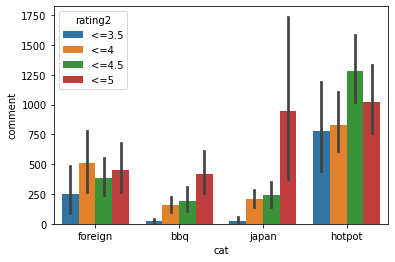

In [22]:
#柱状图不同美食品类的点评数量
sns.barplot(x="cat",y="comment",hue="rating2",data=mt)